In [18]:
# Importimi i librarive
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns  
from matplotlib.cm import get_cmap

In [5]:
# Leximi i CSV file-ve me të dhëna për GDP, papunësi dhe inflacion
GDP_df = pd.read_csv('C:\\Users\\online\\OneDrive\\Desktop\\Semestri 6\\Shkenca e të dhënave dhe Vizualizimi me Python\\Krahasimi i indekseve ekonomike\\GDP.csv', encoding="latin1")
unemployment_df = pd.read_csv('C:\\Users\\online\\OneDrive\\Desktop\\Semestri 6\\Shkenca e të dhënave dhe Vizualizimi me Python\\Krahasimi i indekseve ekonomike\\Unemployment.csv', encoding="latin1")
inflation_df = pd.read_csv('C:\\Users\\online\\OneDrive\\Desktop\\Semestri 6\\Shkenca e të dhënave dhe Vizualizimi me Python\\Krahasimi i indekseve ekonomike\\inflation.csv', encoding="latin1")

In [8]:
# Heqja e kolonave të panevojshme 
cols_to_drop = ['Country Code','Series Name','Series Code']
GDP_df.drop(columns=cols_to_drop, inplace=True)
unemployment_df.drop(columns=cols_to_drop, inplace=True)
inflation_df.drop(columns=cols_to_drop, inplace=True)

In [10]:
# Transformimi i të dhënave nga forma wide në formën long 
def transform_to_long(df, value_name):
    return df.melt(id_vars=['Country Name'], var_name="Year", value_name=value_name)

GDP_long_df = transform_to_long(GDP_df, "GDP growth (annual %)")
unemployment_long_df = transform_to_long(unemployment_df, "Unemployment, total (% of total labor force) (modeled ILO estimate)")
inflation_long_df = transform_to_long(inflation_df, "Inflation, consumer prices (annual %)")

In [12]:
# Konvertimi i vitit në format numerik 
for df in [GDP_long_df, unemployment_long_df, inflation_long_df]:
    df['Year'] = pd.to_numeric(df['Year'].str.extract(r'(\d{4})')[0], errors='coerce')

In [14]:
# Kontrollimi i llojit të të dhënave 
dfs = [GDP_long_df, unemployment_long_df, inflation_long_df]

for df in dfs:
    print(df.dtypes)

Country Name              object
Year                       int64
GDP growth (annual %)    float64
dtype: object
Country Name                                                            object
Year                                                                     int64
Unemployment, total (% of total labor force) (modeled ILO estimate)    float64
dtype: object
Country Name                              object
Year                                       int64
Inflation, consumer prices (annual %)    float64
dtype: object


In [19]:
# Kontrollimi  i numrit të vlerave të munguar në kolonat 'Year' dhe 'Country Name' 
for df in dfs:
    print(df[['Year', 'Country Name']].isnull().sum())

Year            0
Country Name    0
dtype: int64
Year            0
Country Name    0
dtype: int64
Year            0
Country Name    0
dtype: int64


In [22]:
# Bashkimi i të dhënave nga tre DataFrame përmes 'Country Name' dhe 'Year'
df = GDP_long_df.merge(unemployment_long_df, on=["Country Name", "Year"], how="outer") \
                .merge(inflation_long_df, on=["Country Name" ,"Year"], how="outer")

In [25]:
# Heqja e rreshtav ku emri i vendit mungon (është null ose bosh)
df = df[df['Country Name'].notna()]

In [28]:
# Ndryshimi i emrave të kolonave 
df.rename(columns={
    'Country Name':'Country',
    'GDP growth (annual %)': 'GDP_growth',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)': 'Unemployment',
    'Inflation, consumer prices (annual %)': 'Inflation'
}, inplace=True)

In [31]:
# Ruajtja e të dhënave të përpunuara në një file CSV pa indek
df.to_csv("Economic_Indicators_Balkans.csv", index=False)

In [20]:
# Leximi i të dhënave të përpunuara nga file CSV në një DataFrame
df = pd.read_csv('C:\\Users\\online\\OneDrive\\Desktop\\Semestri 6\\Shkenca e të dhënave dhe Vizualizimi me Python\\Krahasimi i indekseve ekonomike\\Economic_Indicators_Balkans.csv', encoding="latin1")

In [127]:
# Shfaqja e disa rreshtave të parë të datasetit dhe kontrollimi i numrit të vlerave të mungura 
df.head()
df.isnull().sum()

Country         0
Year            0
GDP_growth      0
Unemployment    0
Inflation       0
dtype: int64

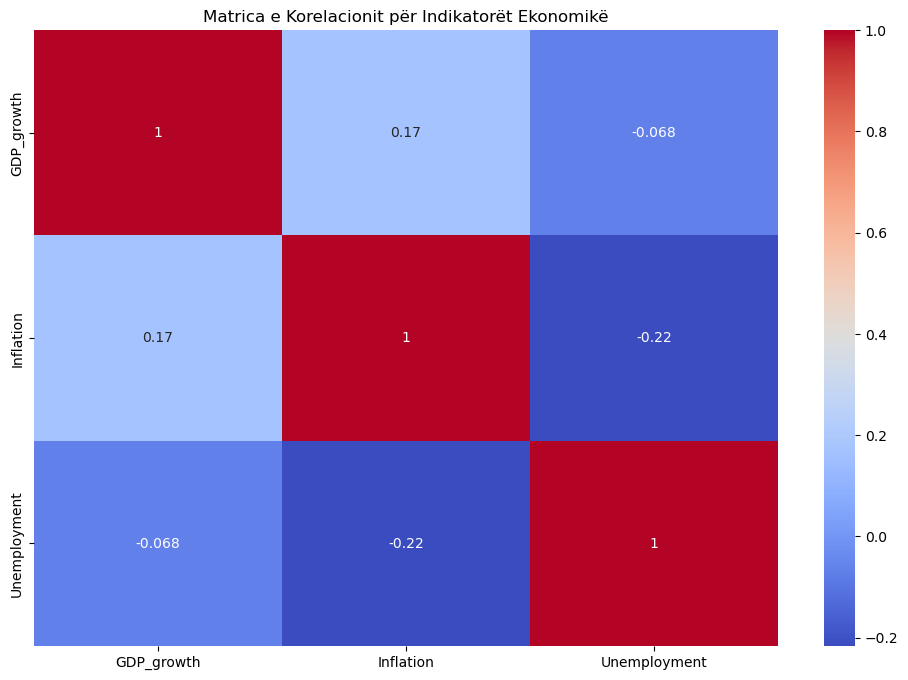

In [10]:
# Matrica e korelacionit për indikatorët ekonomikë (GDP, Inflacion, Papunësi) për të gjitha vendet së bashku
plt.figure(figsize=(12, 8))
sns.heatmap(df[['GDP_growth', 'Inflation', 'Unemployment']].corr(), annot=True, cmap='coolwarm')
plt.title('Matrica e Korelacionit për Indikatorët Ekonomikë')
plt.show()

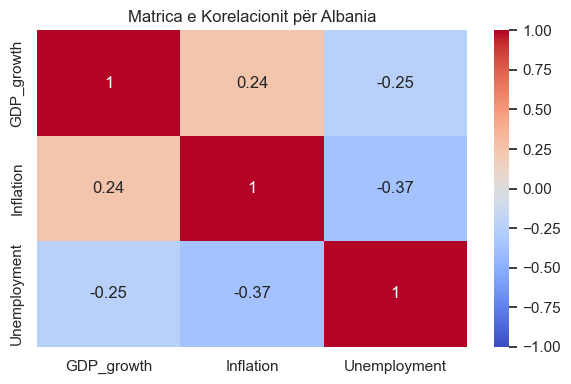

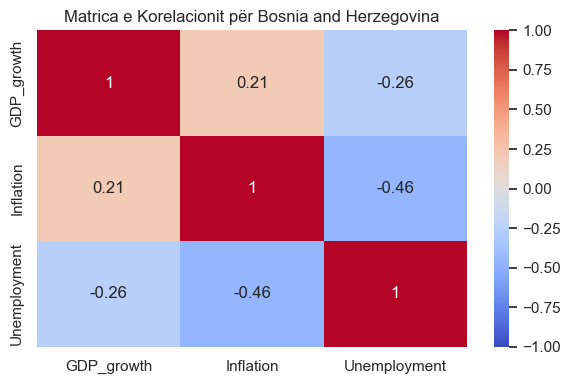

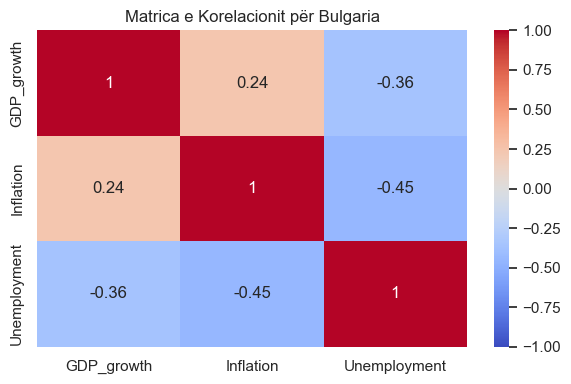

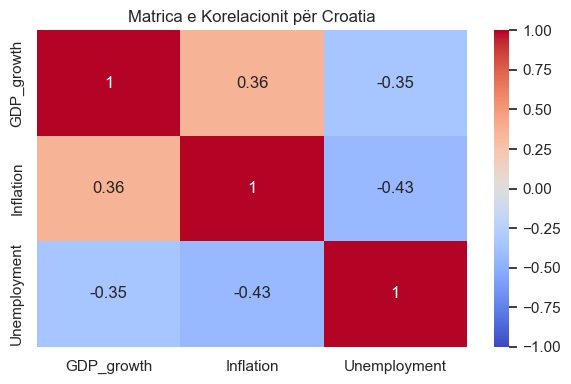

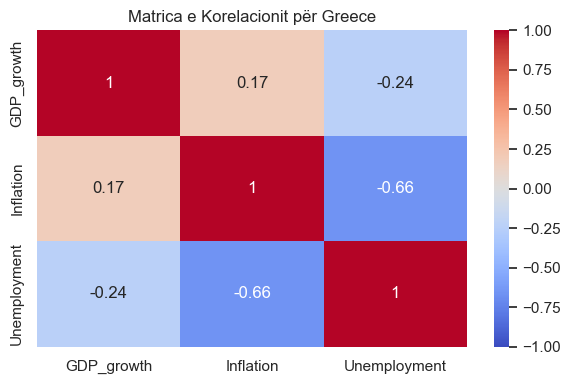

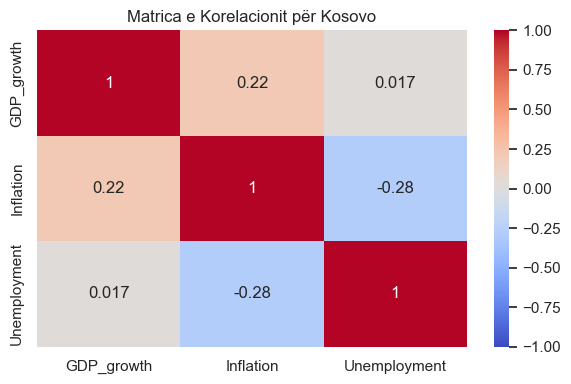

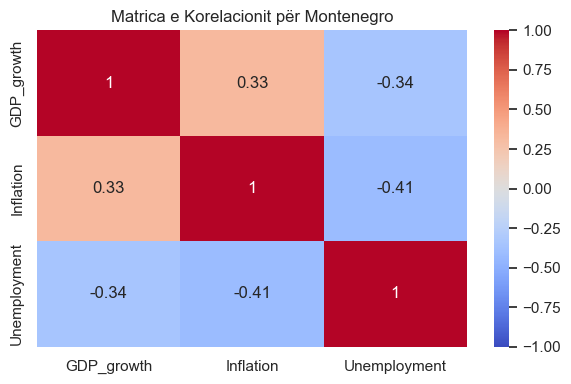

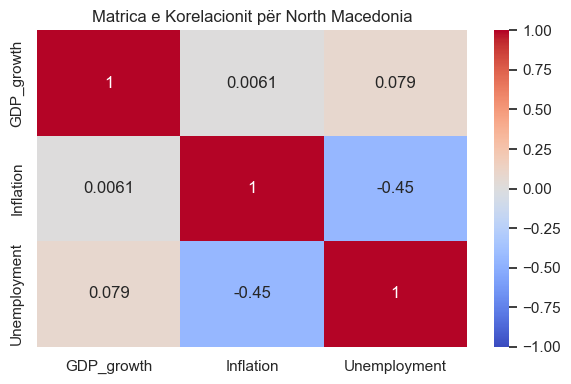

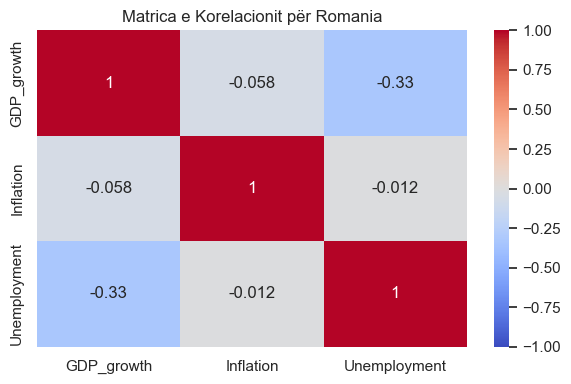

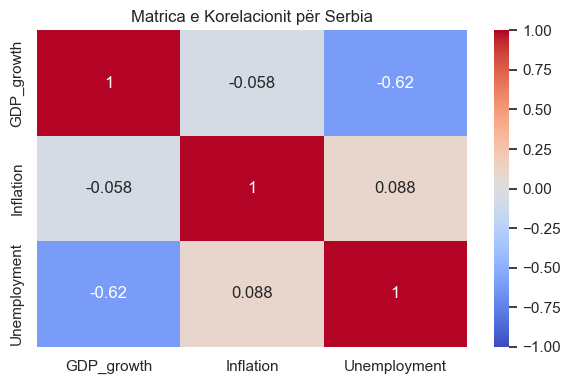

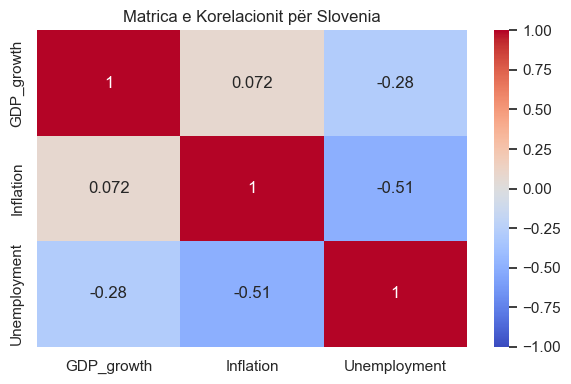

In [131]:
# Matrica e korelacionit për indikatorët ekonomikë (GDP, Inflacion, Papunësi) për secilin vend veç e veç
countries = df['Country'].unique()

for country in countries:
    df_country = df[df['Country'] == country]
    corr = df_country[['GDP_growth', 'Inflation', 'Unemployment']].corr()

    plt.figure(figsize=(6, 4))
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Matrica e Korelacionit për {country}')
    plt.tight_layout()
    plt.show()
    plt.close()
    print("\n" * 2)

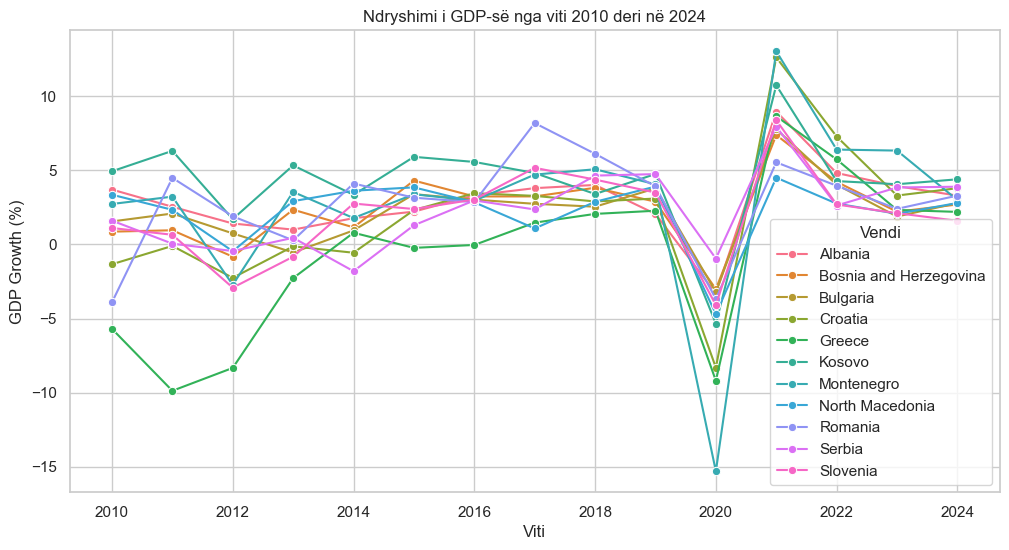

In [132]:
# Grafiku linjë (lineplot) që paraqet ndryshimin e GDP-së nga viti 2010 deri në 2024
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='GDP_growth', hue='Country', marker='o')
plt.title("Ndryshimi i GDP-së nga viti 2010 deri në 2024")
plt.ylabel("GDP Growth (%)")
plt.xlabel("Viti")
plt.legend(title="Vendi")
plt.show()

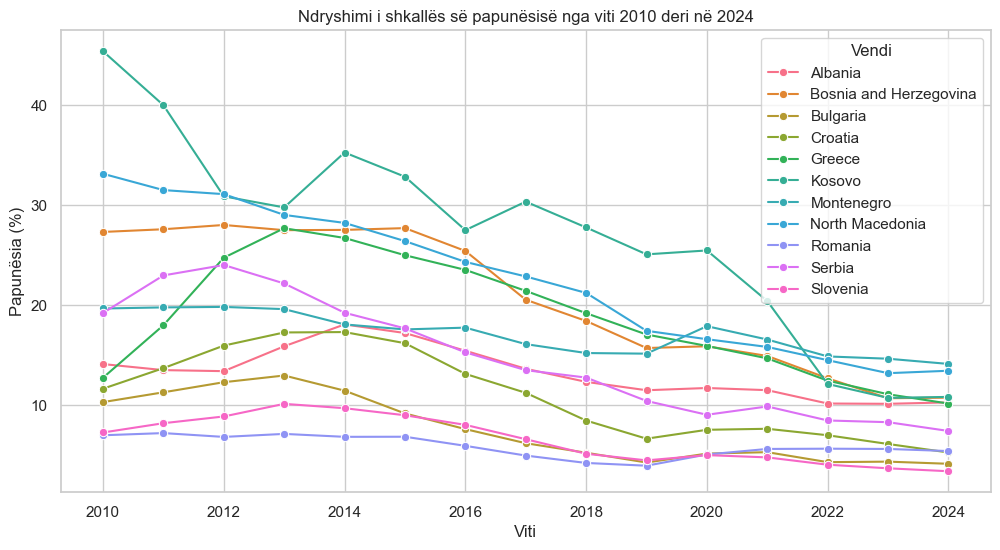

In [135]:
# Grafiku linjë (lineplot) që tregon ndryshimi e shkallës së papunësisë nga viti 2010 deri në 2024.
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Unemployment', hue='Country', marker='o')
plt.title("Ndryshimi i shkallës së papunësisë nga viti 2010 deri në 2024")
plt.ylabel("Papunësia (%)")
plt.xlabel("Viti")
plt.legend(title="Vendi")
plt.show()

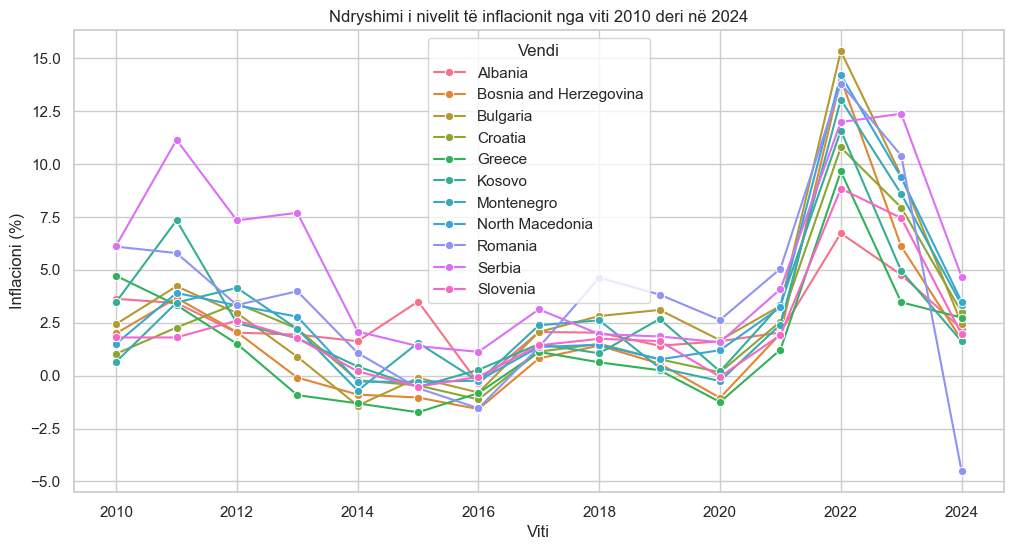

In [137]:
# Grafiku linjë (lineplot) që paraqet ndryshimet e nivelit të inflacionit nga viti 2010 deri në 2024.
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Inflation', hue='Country', marker='o')
plt.title("Ndryshimi i nivelit të inflacionit nga viti 2010 deri në 2024")
plt.ylabel("Inflacioni (%)")
plt.xlabel("Viti")
plt.legend(title="Vendi")
plt.show()

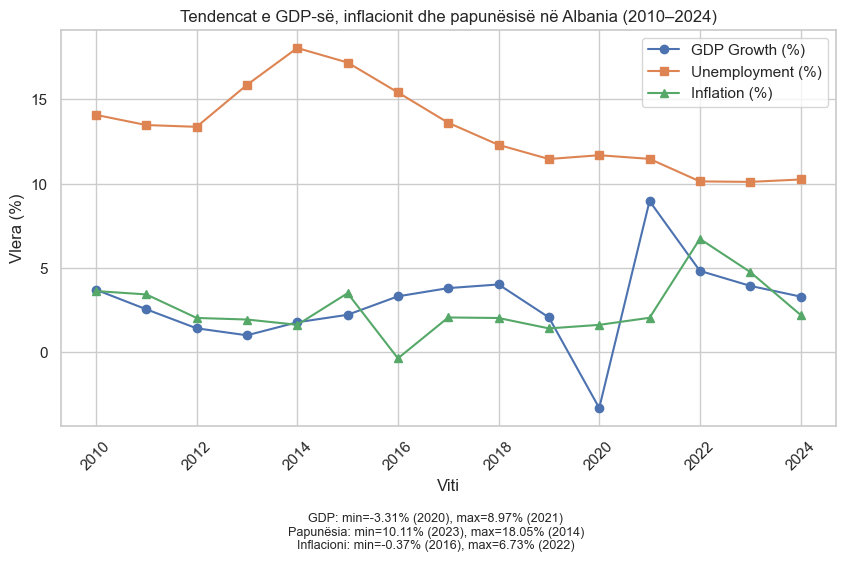

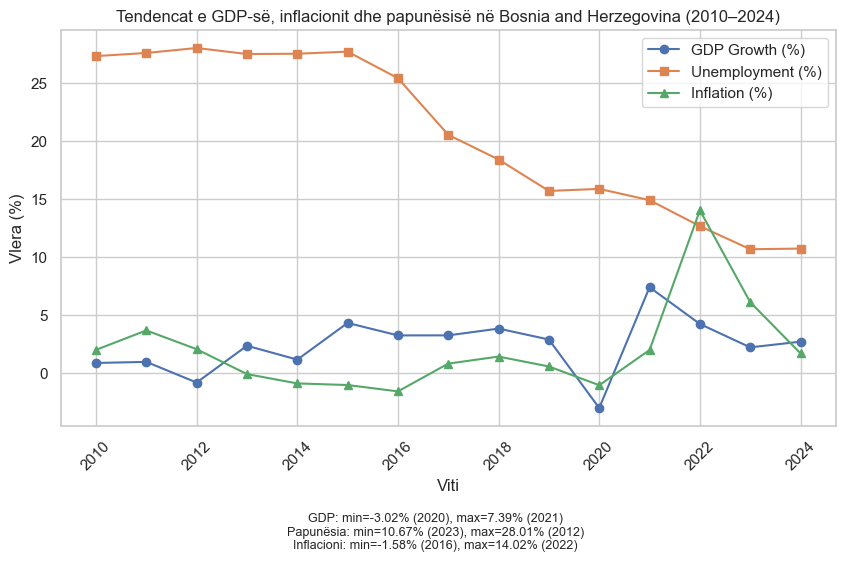

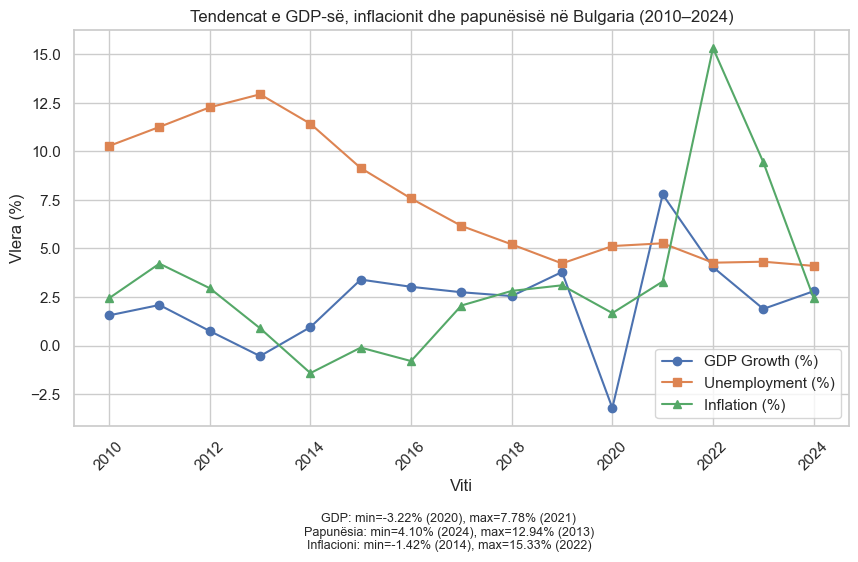

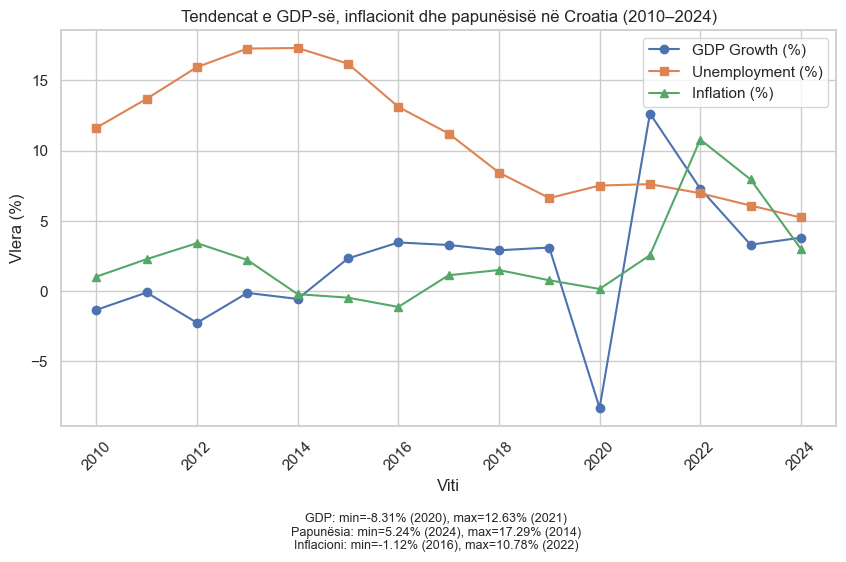

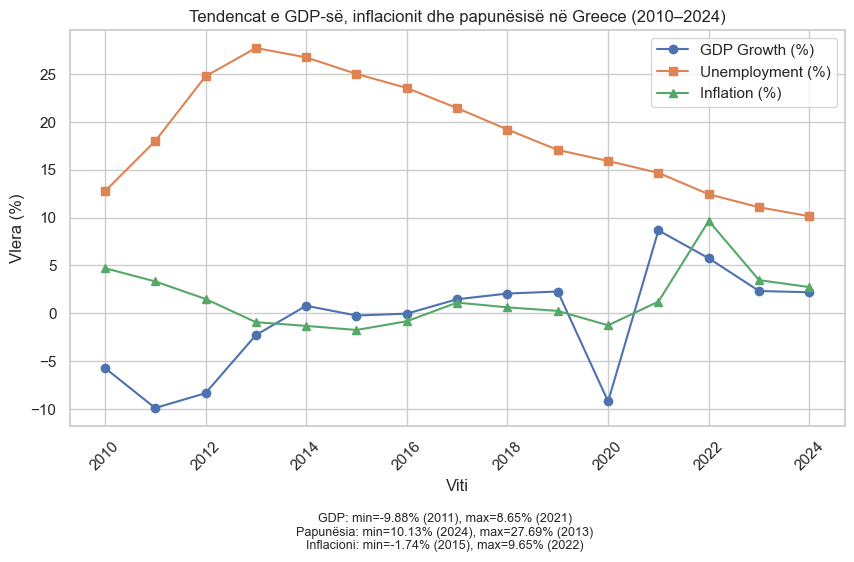

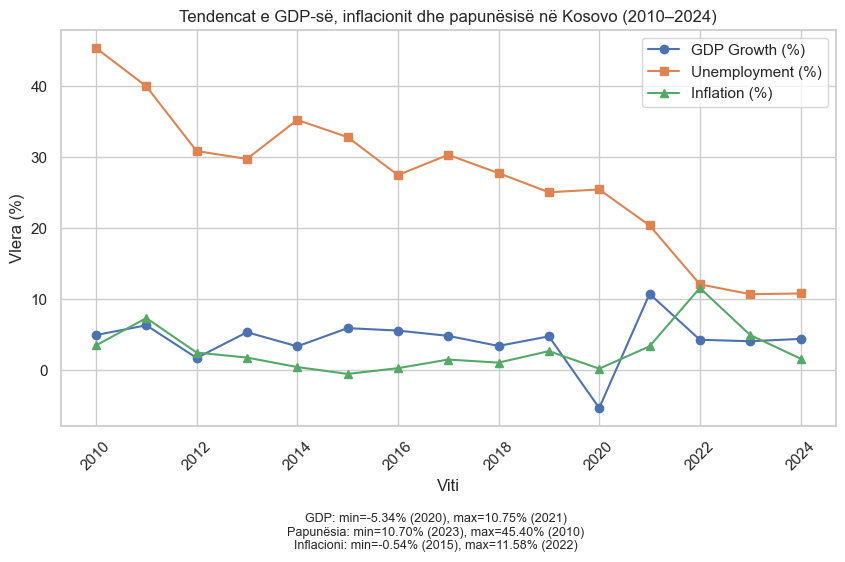

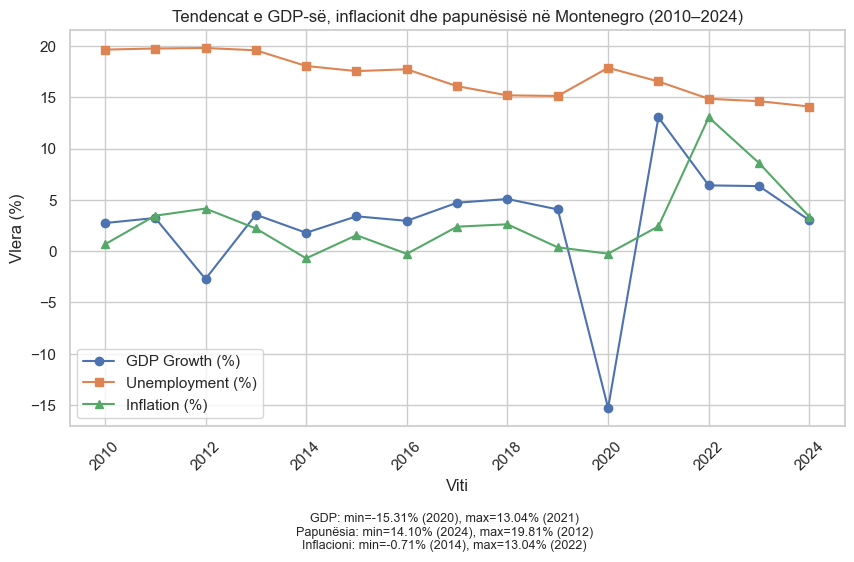

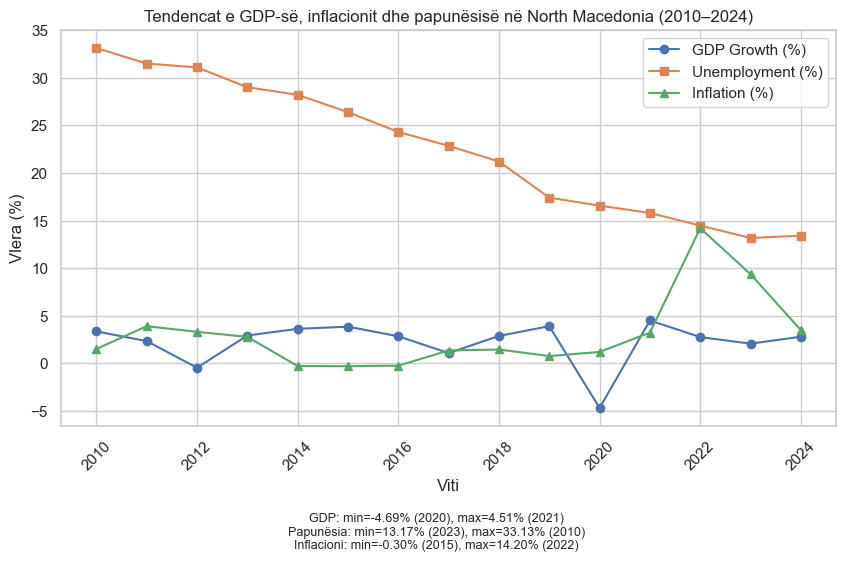

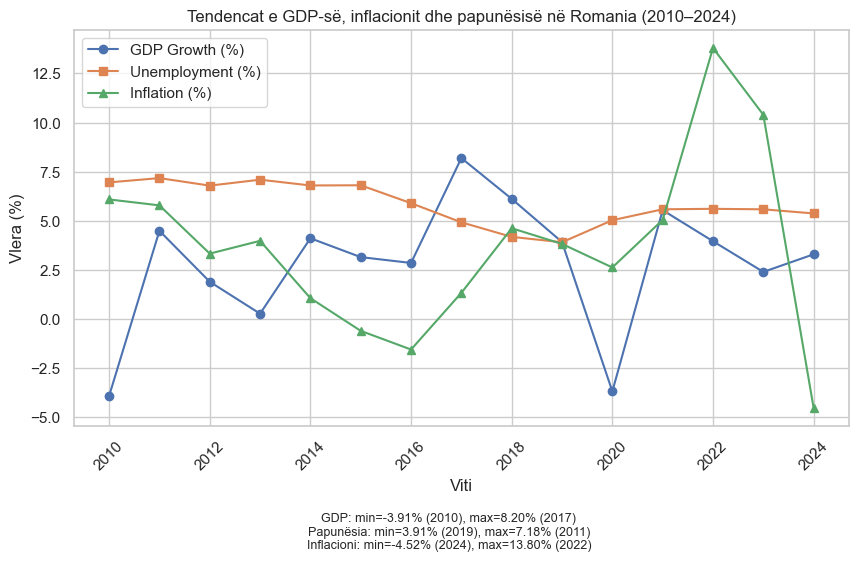

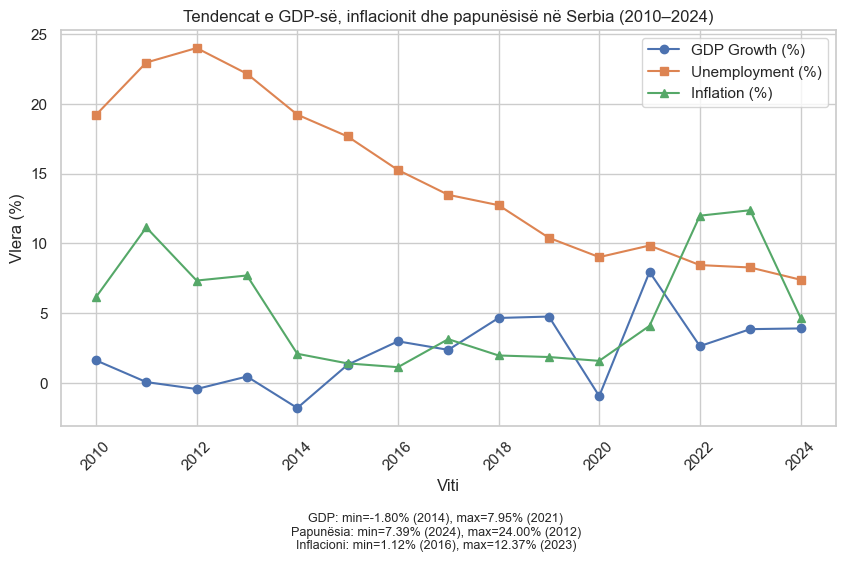

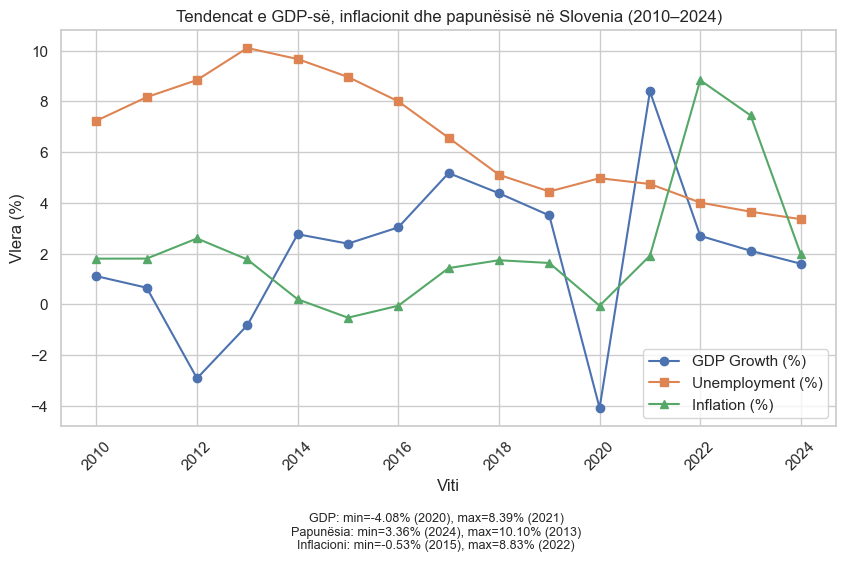

In [139]:
# Grafiku i indikatorëve ekonomikë (GDP, papunësia dhe inflacioni) gjatë viteve për secilin vend veçmas 
# Gjetja e vlerave minimale dhe maksimale 
countries = df['Country'].unique()

for country in countries:
    country_df = df[df['Country'] == country]

    # Gjetja e vlerës minimale dhe maksimale të GDP-së 
    gdp_min = country_df['GDP_growth'].min()
    gdp_min_year = country_df.loc[country_df['GDP_growth'].idxmin(), 'Year']
    gdp_max = country_df['GDP_growth'].max()
    gdp_max_year = country_df.loc[country_df['GDP_growth'].idxmax(), 'Year']

    # Gjetja e vlerës minimale dhe maksimale të papunësisë
    unemp_min = country_df['Unemployment'].min()
    unemp_min_year = country_df.loc[country_df['Unemployment'].idxmin(), 'Year']
    unemp_max = country_df['Unemployment'].max()
    unemp_max_year = country_df.loc[country_df['Unemployment'].idxmax(), 'Year']

    # Gjetja e vlerës minimale dhe maksimale të inflacionit
    infl_min = country_df['Inflation'].min()
    infl_min_year = country_df.loc[country_df['Inflation'].idxmin(), 'Year']
    infl_max = country_df['Inflation'].max()
    infl_max_year = country_df.loc[country_df['Inflation'].idxmax(), 'Year']

    # Vizualizimi 
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(country_df['Year'], country_df['GDP_growth'], marker='o', label='GDP Growth (%)')
    ax.plot(country_df['Year'], country_df['Unemployment'], marker='s', label='Unemployment (%)')
    ax.plot(country_df['Year'], country_df['Inflation'], marker='^', label='Inflation (%)')
    ax.set_title(f"Tendencat e GDP-së, inflacionit dhe papunësisë në {country} (2010–2024)")
    ax.set_xlabel('Viti')
    ax.set_ylabel('Vlera (%)')
    ax.legend()
    ax.grid(True)
    ax.tick_params(axis='x', labelrotation=45)

    fig.subplots_adjust(bottom=0.22)

    stats_text = (
        f"GDP: min={gdp_min:.2f}% ({gdp_min_year}), max={gdp_max:.2f}% ({gdp_max_year})\n"
        f"Papunësia: min={unemp_min:.2f}% ({unemp_min_year}), max={unemp_max:.2f}% ({unemp_max_year})\n"
        f"Inflacioni: min={infl_min:.2f}% ({infl_min_year}), max={infl_max:.2f}% ({infl_max_year})"
    )
    fig.text(0.5, 0.01, stats_text, ha='center', va='bottom', fontsize=9, bbox=dict(facecolor='white', alpha=0.7))

    plt.show()
    plt.close()
    print("\n" * 3)

In [30]:
# Përgatitja dhe kategorizimi i të dhënave ekonomike sipas periudhave Para, Gjatë dhe Pas COVID-it (2017–2024)
df_analysis_years = df[(df["Year"] >= 2017) & (df["Year"] <= 2024)].copy()

# Funksioni për të kategorizuar çdo vit në një nga tre periudhat kryesore:
# - Para COVID: 2017–2019
# - Gjatë COVID: 2020–2021
# - Pas COVID: 2022–2024
def categorize_period(year):
    if 2017 <= year <= 2019:
        return "Para COVID"
    elif 2020 <= year <= 2021:
        return "Gjatë COVID"
    elif 2022 <= year <= 2024:
        return "Pas COVID"
    else:
        return "Jashtë intervalit të analizës"

df_analysis_years["Periudha"] = df_analysis_years["Year"].apply(categorize_period)

# Llogaritja e mesatares së GDP-së, inflacionit dhe papunësisë për çdo vend dhe periudhë
avg_indicators_by_country_period = df_analysis_years.groupby(["Country", "Periudha"]).agg({
    "GDP_growth": "mean",
    "Inflation": "mean",
    "Unemployment": "mean"
}).reset_index()

# Renditja e periudhave 
period_categories_order = ["Para COVID", "Gjatë COVID", "Pas COVID"]
avg_indicators_by_country_period["Periudha"] = pd.Categorical(
    avg_indicators_by_country_period["Periudha"],
    categories=period_categories_order,
    ordered=True
)

avg_indicators_by_country_period = avg_indicators_by_country_period.sort_values(["Country", "Periudha"]).reset_index(drop=True)

print(avg_indicators_by_country_period)

                   Country     Periudha  GDP_growth  Inflation  Unemployment
0                  Albania   Para COVID    3.294837   1.833250     12.462000
1                  Albania  Gjatë COVID    2.827919   1.831179     11.582000
2                  Albania    Pas COVID    4.021105   4.566485     10.165000
3   Bosnia and Herzegovina   Para COVID    3.319648   0.930008     18.206333
4   Bosnia and Herzegovina  Gjatë COVID    2.187434   0.465171     15.382500
5   Bosnia and Herzegovina    Pas COVID    3.045978   7.272958     11.349333
6                 Bulgaria   Para COVID    3.028080   2.659957      5.201667
7                 Bulgaria  Gjatë COVID    2.282439   2.485093      5.196000
8                 Bulgaria    Pas COVID    2.908531   9.071540      4.230333
9                  Croatia   Para COVID    3.095360   1.133772      8.752333
10                 Croatia  Gjatë COVID    2.160029   1.354659      7.557500
11                 Croatia    Pas COVID    4.796827   7.240621      6.094000

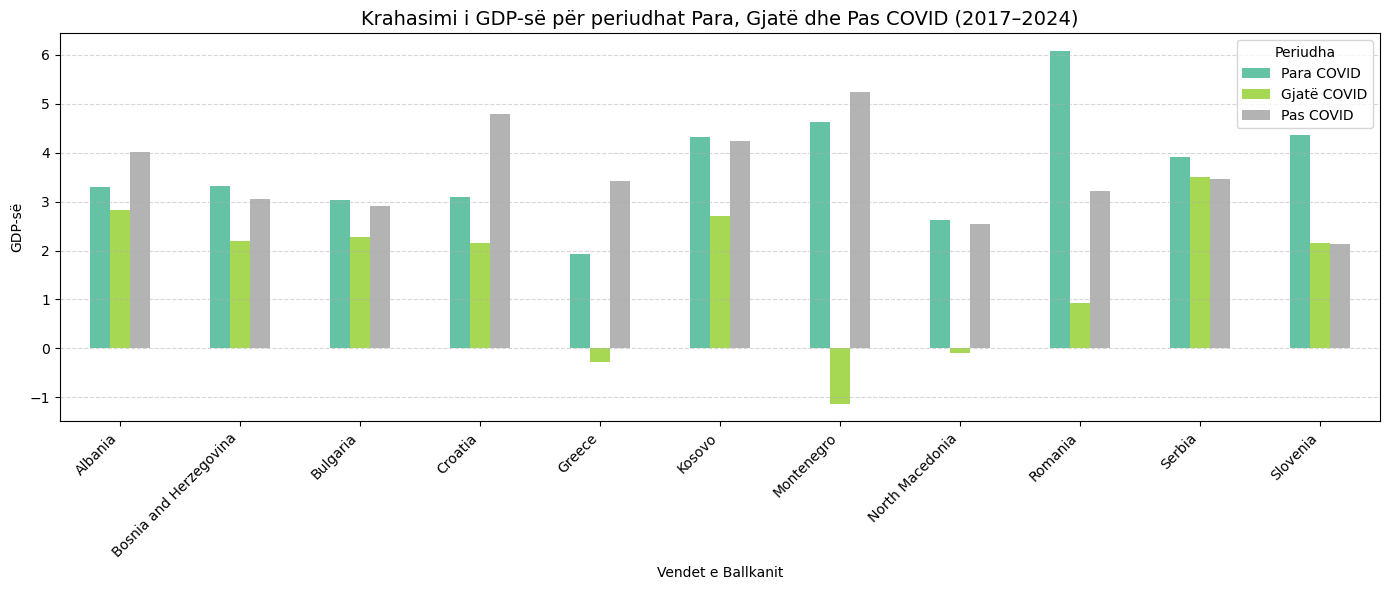

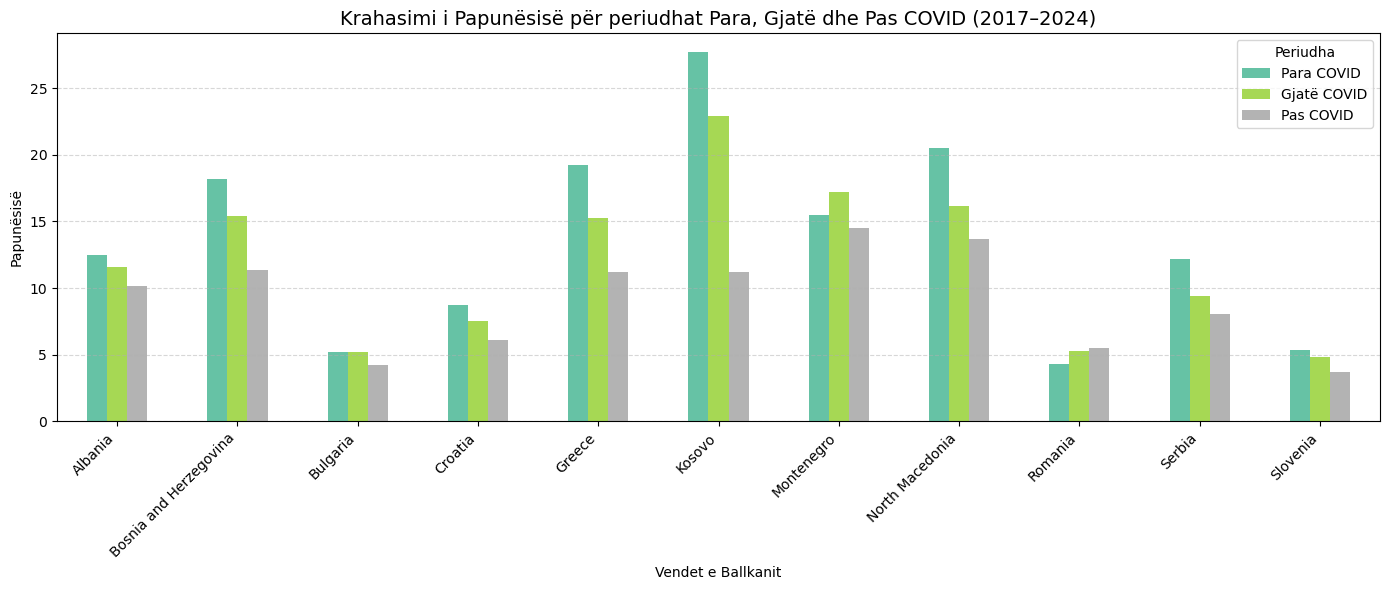

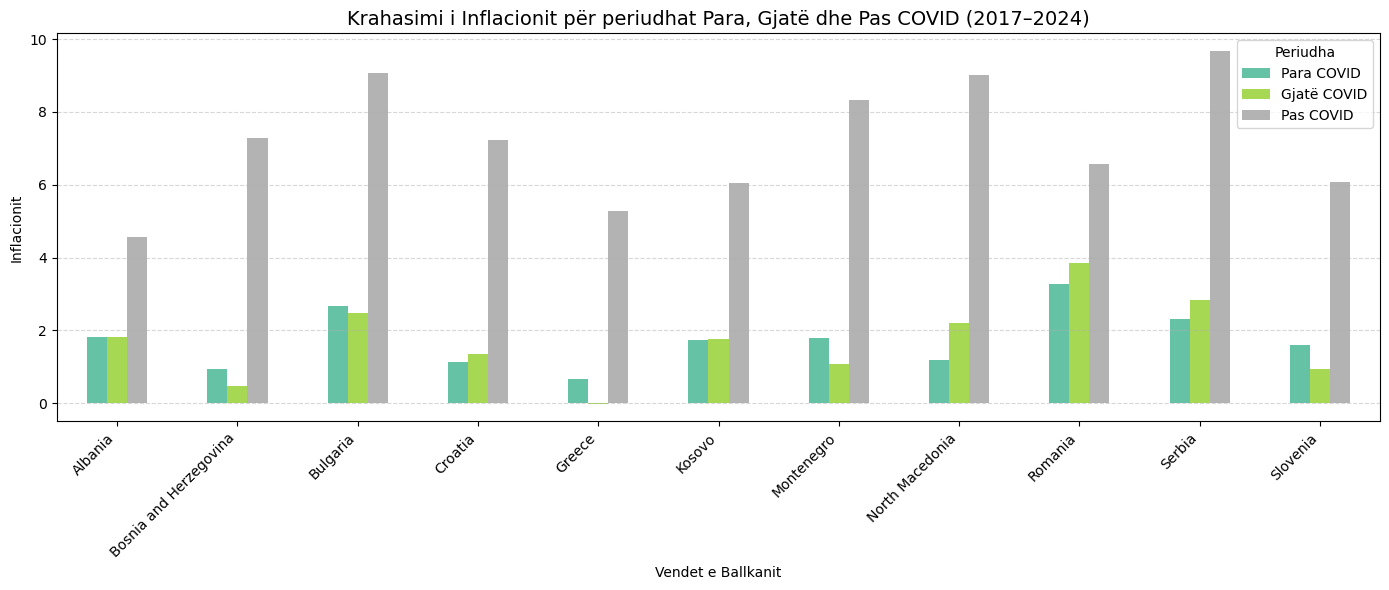

In [44]:
# Vizualizimi i ndryshimit të treguesve ekonomikë Para, Gjatë dhe Pas COVID-it.
custom_palette = plt.colormaps["Set2"]

indikatore = {
    "GDP_growth": "GDP-së",
    "Unemployment": "Papunësisë",
    "Inflation": "Inflacionit"
}

for indikator, titull in indikatore.items():
    df_plot = avg_indicators_by_country_period.pivot(index="Country", columns="Periudha", values=indikator)
    ax = df_plot.plot(kind="bar", figsize=(14, 6), colormap=custom_palette)
    plt.title(f"Krahasimi i {titull} për periudhat Para, Gjatë dhe Pas COVID (2017–2024)", fontsize=14)
    plt.ylabel(titull)
    plt.xlabel("Vendet e Ballkanit")
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.legend(title="Periudha")
    plt.tight_layout()
    plt.show()